In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Hoeffding Inequality

In [ ]:
def flip_1000():
  result = []
  all_coins = []

  lowest_freq = 1.0
  c_1_index = 0
  c_min_index = 0
  c_rand_index = random.randint(0,999)

  # Flip 1000 coins
  for x in range(1000):
    # For each coin
    curr_coin = []
    curr_headcount = 0
    # Flip 10 times
    for x in range(10):
      flip = random.randint(0,1)
      # If heads, increment headcount
      if(flip == 1):
        curr_headcount += 1
      # Add the flip to the coin
      curr_coin.append(flip)
    # if the curr_coin frequency is less than the lowest, update it
    if((curr_headcount / 10.0) < lowest_freq):
      lowest_freq = (curr_headcount / 10.0)
      c_min_index = x
    # Add the current coin to all the coins
    all_coins.append(curr_coin)
  c_1 = all_coins[c_1_index]
  c_rand = all_coins[c_rand_index]
  c_min = all_coins[c_min_index]

  v_1 = c_1.count(1) / 10.0
  v_rand = c_rand.count(1) / 10.0
  v_min = lowest_freq

  return v_1, v_rand, v_min

Average Value of v_min: 0.03747000000000167


V_1, V_rand, V_min Distributions



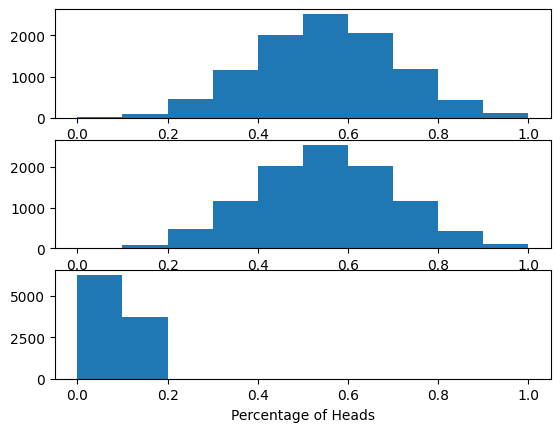

In [ ]:
all_v_1 = []
all_v_rand = []
all_v_min = []

n = 10000
for x in range(n):
  v_1, v_rand, v_min = flip_1000()
  all_v_1.append(v_1)
  all_v_rand.append(v_rand)
  all_v_min.append(v_min)

v_min_avg = sum(all_v_min) / n
print(f'Average Value of v_min: {v_min_avg}\n\n')
print("V_1, V_rand, V_min Distributions\n")

fig, axis = plt.subplots(3)

axis[0].hist(all_v_1, bins=np.linspace(0, 10, 11)/10)
# axis[0].title("V_1 Distribution")

axis[1].hist(all_v_rand, bins=np.linspace(0, 10, 11)/10)
# axis[1].title("V_rand Distribution")

axis[2].hist(all_v_min, bins=np.linspace(0, 10, 11)/10)
# axis[2].title("V_min Distribution")

plt.xlabel("Percentage of Heads")
plt.show()

**1. b**
the average value of v_min is closest to 0.01.

**2. d**
For the distribution to satisfy the single-bin Hoeffding Inequality, it must be binomial. Only v_1 and v_rand satisfy this requirement.

# Error and Noise

**3. e**
Let $\mu$ = the probability that $h$ makes an error in approximating $f$ and $λ$ = the probability that y = $f(x)$. There are two cases in which an error occurs.
1. $h$ makes an error, but y is correct.
2. $h$ does not make an error, but y is incorrect.

The probability of case 1 occuring is $\mu*λ$. The probability of case 2 occuring is $(1-\mu)*(1-λ)$. Thus, the total probability of error is $(\mu*λ)+(1-\mu)*(1-λ)$

**4. b**
If we expand the previous equation, we get $P = \muλ + (1-\mu-λ+\muλ) = 1 - \mu - λ + 2\muλ$. Rearranging the equation such that $\mu$ terms are together, we get $P = 1-λ + \mu(2λ-1)$. For the performace of $h$ to be independent of $\mu$, we can plug in $λ = 0.5$. From this, we get $P = 1 - 0.5 = 0.5$

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import random
import math

In [ ]:
def get_rand_points():
  p1 = (random.uniform(-1,1), random.uniform(-1,1))
  p2 = (random.uniform(-1,1), random.uniform(-1,1))
  return p1, p2

def get_target_function():
  p1, p2 = get_rand_points()
  slope = (p2[1] - p1[1]) / (p2[0] - p1[0])
  intercept = p2[1] - (slope * p2[0])
  return (slope, intercept)


In [ ]:
n = 100
runs = 1000

g = []
E_in = []
for i in range(runs):
    p1, p2 = get_rand_points()
    tar_func = get_target_function()
    m = tar_func[0]
    b = tar_func[1]

    x = np.random.uniform(-1, 1, size=(n,2))

    def y_func(x:np.ndarray):
        return np.sign(m*x[0]-x[1]+b).astype(int)

    y = np.apply_along_axis(y_func, 1, x)

    model = LinearRegression().fit(x, y)
    g.append(model)

    eIn = np.bincount(np.sign(model.predict(x)).astype(int) == y)[0] / len(x)
    E_in.append(eIn)

sum(E_in) / runs

0.03978000000000008

**5. c**
The output is closest to 0.01.

In [ ]:
runs = 1000
E_out = []

for _ in range(runs):
    p1, p2 = get_rand_points()
    tar_func = get_target_function()
    m = tar_func[0]
    b = tar_func[1]
    x = np.random.uniform(-1, 1, size=(n,2))

    def y_func(x:np.ndarray):
        return np.sign(m*x[0]-x[1]+b).astype(int)

    y = np.apply_along_axis(y_func, 1, x)

    model = LinearRegression().fit(x, y)

    new_points = 1000
    x_new = np.random.uniform(-1, 1, size=(new_points, 2))
    y_new = np.apply_along_axis(y_func, 1, x_new)

    eOut = np.bincount(np.sign(model.predict(x_new)).astype(int) == y_new)[0] / len(x_new)
    E_out.append(eOut)

sum(E_out) / runs

0.04930399999999996

**6. c**
The output is closest to 0.01.

In [ ]:
def g(point: np.ndarray, weights: np.ndarray) -> int:
    return np.sign( np.dot( np.transpose(weights), point ) ).astype(int)

def converges():
    for i,point in enumerate(XWithBias):
        if g(point, linear_regression_weights) != Y[i]:
            return False
    numIterationsList.append(counter)

In [ ]:
n = 10
runs = 1000

numIterationsList = []

for _ in range(runs):
    p1, p2 = get_rand_points()
    tar_func = get_target_function()
    m = tar_func[0]
    b = tar_func[1]

    weightsForF = np.array([b, m, -1])
    X = np.random.uniform(-1, 1, size=(n,2))
    XWithBias = np.insert(x, 0, 1, axis=1)
    Y = np.sign(np.dot(XWithBias, weightsForF))

    XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
    linear_regression_weights = np.dot(XDagger, Y)

    counter = 0
    while not converges():
        counter += 1
        correctNs = []
        wrongNs = []

        for i,point in enumerate(XWithBias):
            if g(point,linear_regression_weights) == y[i]:
                correctNs.append(i)
            else:
                wrongNs.append(i)

        if len(wrongNs) == 0:
          break
        updateN = random.choice(wrongNs)

        for i,weight in enumerate(linear_regression_weights):
            linear_regression_weights[i] = linear_regression_weights[i] + y[updateN] * XWithBias[updateN][i]

avg_runs = sum(numIterationsList)/runs
print(f'Average runs until conversion : {avg_runs}')

Average runs until conversion : 2.381


**7. a**
The output is closest to 1.

# Nonlinear Transformation

In [ ]:
def f(x:np.ndarray):
    return np.sign(x[0]**2+x[1]**2-0.6).astype(int)

In [ ]:
n = 1000
X = np.random.uniform(-1, 1, size=(n,2))
Y = np.apply_along_axis(f, 1, X)

noisyIdxs = np.random.choice(n, int(n/10), replace=False)
for i in noisyIdxs:
    Y[i] = np.negative(Y[i])

XWithBias = np.insert(X, 0, 1, axis=1)
XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
weightsFromLinearRegression = np.dot(XDagger, Y)
YPred = np.sign(np.dot(XWithBias, weightsFromLinearRegression))


In [ ]:
runs = 1000
eIns = []

for _ in range(runs):
    X = np.random.uniform(-1, 1, size=(n,2))
    def f(x:np.ndarray):
        return np.sign(x[0]**2+x[1]**2-0.6).astype(int)
    Y = np.apply_along_axis(f, 1, X)

    # Simulate noise by flipping sign in random 10% of Y
    noisyIdxs = np.random.choice(n, int(n/10), replace=False)
    for i in noisyIdxs:
        Y[i] = np.negative(Y[i])

    XWithBias = np.insert(X, 0, 1, axis=1)

    # Let's apply linear regression
    XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
    weightsFromLinearRegression = np.dot(XDagger, Y)

    # Make predictions from our linear regression weights
    YPred = np.sign(np.dot(XWithBias, weightsFromLinearRegression))

    # And check how many we errorz
    eIn = sum(YPred != Y) / n
    eIns.append(eIn)

avg_e_in = sum(eIns)/runs
print(f'\nEstimated eIn avg: {avg_e_in}')


Estimated eIn avg: 0.5056669999999998


**8. d**
The output is closest to 0.5.

In [ ]:
n = 1000
runs = 1000

e_In_A = []
e_In_B = []
e_In_C = []
e_In_D = []
e_In_E = []

weightsA = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
weightsB = np.array([-1, -0.05, 0.08, 0.13, 1.5, 15])
weightsC = np.array([-1, -0.05, 0.08, 0.13, 15, 1.5])
weightsD = np.array([-1, -1.5, 0.08, 0.13, 0.05, 0.05])
weightsE = np.array([-1, -0.05, 0.08, 1.5, 0.15, 0.15])

def get_e_in(weights, X, YLinReg):
  y = np.sign(np.dot(X, weights))
  e_in = sum(y != YLinReg) / n
  return e_in

for _ in range(runs):
    X = np.random.uniform(-1, 1, size=(n,2))
    x1s = X[:,0]
    x2s = X[:,1]

    Y = np.apply_along_axis(f, 1, X)
    X = np.array([ np.ones(n), x1s, x2s, x1s*x2s, x1s**2, x2s**2 ]).T

    XDagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    linRegWeights = np.dot(XDagger, Y)
    YLinReg = np.sign(np.dot(X, linRegWeights))


    eInA = get_e_in(weightsA, X, YLinReg)
    eInB = get_e_in(weightsB, X, YLinReg)
    eInC = get_e_in(weightsC, X, YLinReg)
    eInD = get_e_in(weightsD, X, YLinReg)
    eInE = get_e_in(weightsE, X, YLinReg)

    e_In_A.append(eInA)
    e_In_B.append(eInB)
    e_In_C.append(eInC)
    e_In_D.append(eInD)
    e_In_E.append(eInE)

print(f'A: {sum(e_In_A)/runs}\n')
print(f'B: {sum(e_In_B)/runs}\n')
print(f'C: {sum(e_In_C)/runs}\n')
print(f'D: {sum(e_In_D)/runs}\n')
print(f'E: {sum(e_In_E)/runs}\n')

A: 0.03331399999999993

B: 0.3360840000000005

C: 0.3363100000000004

D: 0.3684570000000002

E: 0.4400480000000002



**9. a**
A is closest.

In [ ]:
def f(x:np.ndarray):
    return np.sign(x[0]**2+x[1]**2-0.6).astype(int)

In [ ]:
n = 1000
runs = 1000

eOuts = []
weights = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
for _ in range(runs):
    X = np.random.uniform(-1, 1, size=(n,2))
    x1s = X[:,0]
    x2s = X[:,1]

    Y = np.apply_along_axis(f, 1, X)

    noisyIdxs = np.random.choice(n, int(N/10), replace=False)
    for i in noisyIdxs:
        Y[i] = np.negative(Y[i])

    X = np.array([ np.ones(n), x1s, x2s, x1s*x2s, x1s**2, x2s**2 ]).T
    YPred = np.sign(np.dot(X, weights))


    eOut = sum(YPred != Y) / n
    eOuts.append(eOut)

e_out = sum(eOuts) / runs
print(f'Estimated eOut : {e_out}')

Estimated eOut : 0.14257200000000023


**10. b**
The output is closest to 0.1.